#Lecture 5.4: ElasticNet Penalty and Efficient Solution

##Readings
https://en.wikipedia.org/wiki/Elastic_net_regularization
https://en.wikipedia.org/wiki/Lp_space#The_p-norm_in_finite_dimensions
http://statweb.stanford.edu/~jhf/ftp/glmnet.pdf
http://ai.stanford.edu/~ang/papers/icml04-l1l2.pdf


##Penalty Functions
In the last lecture you saw how the introduction of a sum-of-squared penalty on the weights could serve to regularize linear regression.  The penalty forced the weight vector to be somewhat smaller in magnitude than the weights for unconstrained ordinary least squares regression.  Sum of squares isn't the only way to quantify the length of a vector.  Sum of squares corresponds to Euclidean distance and is referred to in the literature as $L_2$-norm.  But any Minkowski norm could be used as a penalty.  Thus the penalized regression problem you saw last time was 

$w^*, b^* = argmin_{w, b} \frac1M \sum_{i=1}^M (y_i - (b + x_i w^T))^2  + \alpha (w_1^2 + w_2^2 + ... + w_N^2)$

This looks a little different because the squares of the weights are written out instead of being expressed (equivalently) as $ww^T$.  The power to which each weight is raised before being squared could be any positive number p.  

$w^*, b^* = argmin_{w, b} \frac1M \sum_{i=1}^M (y_i - (b + x_i w^T))^2  + \alpha (|w_1|^p + |w_2|^p + ... + |w_N|^p)$

As a practical matter, the most frequently used penalty norms are $L_2$ and $L_1$.  $L_1$ corresponds to $p=1$ and $L_2$ corresponds to $p=2$.  The $L_1$ norm of the weights is the sum of the absolute values of the weights.  The choice of using $L_1$ versus $L_2$ matters because it leads to some useful differences in the solutions to the penalized regression problem.  The principal differences are 1) $L_1$ gives sparse weight vectors and is less sensitive to irrelevant features (Ng paper).  2) $L_2$ deals better with correlated attributes.  You can understand some of these differences by referring to one of the figures from "Elements of Statistical Learning" - the excellent book on machine learning by Stanford professors Hastie, Tibshirani and Friedman.  This link will take you to the website for the book (which is free online).  
http://statweb.stanford.edu/~tibs/ElemStatLearn/ - Figure 3.11  

The point to be made from this figure is that the solutions with $L_1$ penalty get stuck on the points of the $L_1$-ball.  These points are aligned along the coordinate axes which means automatically that some of the weights are zero.  

##ElasticNet Penalty
ElasticNet (https://web.stanford.edu/~hastie/Papers/elasticnet.pdf) is a penalty developed by Zou and Hastie at Stanford specifically for penalized regression.  Here's that the ElasticNet penalty looks like.  

$ElasticNet Penalty = P_{\lambda}(w) = (1 - \lambda)(w_1^2 + w_2^2 + ... + w_N^2) + \lambda(|w_1| + |w_2| + ... + |w_N|)$

This penalty is a blend of $L_1$ and $L_2$.  In this expression $\lambda$ is a parameter that ranges from 0 to 1.  It controls whether the blend is more heavily $L_1$ or $L_2$.  If $\lambda = 0$, then the penalty is all $L_2$.  If $\lambda = 1$, then the penalty is all $L_1$.  Friedman's glmnet paper shows the coefficient curves for different values of the $\lambda$ parameter.  That paper outlines a very fast solution approach that makes glmnet a very scalable algorithm for solving penalized regression problems.  The sklearn package "ElasticNet" provides a python version.  The code below demonstrates its use.  


5.10682407389e-05
[  1.92268648e-02   1.79310385e-02   1.67225465e-02   1.55955028e-02
   1.45444181e-02   1.35641730e-02   1.26499932e-02   1.17974260e-02
   1.10023189e-02   1.02607995e-02   9.56925593e-03   8.92432010e-03
   8.32285080e-03   7.76191851e-03   7.23879118e-03   6.75092088e-03
   6.29593141e-03   5.87160670e-03   5.47588006e-03   5.10682407e-03
   4.76264122e-03   4.44165514e-03   4.14230245e-03   3.86312513e-03
   3.60276343e-03   3.35994923e-03   3.13349990e-03   2.92231249e-03
   2.72535841e-03   2.54167838e-03   2.37037776e-03   2.21062223e-03
   2.06163369e-03   1.92268648e-03   1.79310385e-03   1.67225465e-03
   1.55955028e-03   1.45444181e-03   1.35641730e-03   1.26499932e-03
   1.17974260e-03   1.10023189e-03   1.02607995e-03   9.56925593e-04
   8.92432010e-04   8.32285080e-04   7.76191851e-04   7.23879118e-04
   6.75092088e-04   6.29593141e-04   5.87160670e-04   5.47588006e-04
   5.10682407e-04   4.76264122e-04   4.44165514e-04   4.14230245e-04
   3.86312513e-0

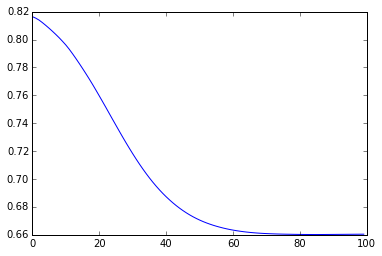

In [1]:
__author__ = 'mike bowles'

from sklearn.linear_model import ElasticNet, ElasticNetCV
import urllib2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib2.urlopen(target_url)
x = []
y = []
names = []
firstLine = True
for row in data:
    if firstLine:
        names = row.strip().split(";")
        firstLine = False
    else:
        rowSplit = row.strip().split(";")
        y.append(float(rowSplit.pop()))
        floatRow = [float(num) for num in rowSplit]
        x.append(floatRow)

eNetModel = ElasticNetCV(l1_ratio=0.5, normalize=True, cv=5, verbose=0, random_state=None, selection='cyclic')

eNetModel.fit(x,y)

print eNetModel.alpha_
print eNetModel.alphas_
xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
print xvalError

plt.plot(xvalError)
plt.show()

##In class coding exercises
1  Rerun the code above for various values of l1_ratio (named $\lambda$ in the discussion above). 

2  Rerun the code with normalize=False.  How much difference does that make?

3  Extract the coefficients corresponding to the best choice of alpha.

##Homework
See what kind of performance you can get on the breast cancer prognosis data using ElasticNet.  